## Perceptron : AND / OR / XOR

In [74]:
import numpy as np

def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = w1*x1 + w2*x2
    if tmp <= theta:
        return 0
    else:
        return 1

In [75]:
print('AND(0,0): {}'.format(AND(0,0)))
print('AND(0,1): {}'.format(AND(0,1)))
print('AND(1,0): {}'.format(AND(1,0)))
print('AND(1,1): {}'.format(AND(1,1)))

AND(0,0): 0
AND(0,1): 0
AND(1,0): 0
AND(1,1): 1


In [16]:
def OR(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.1
    tmp = w1*x1 + w2*x2
    if tmp <= theta:
        return 0
    else:
        return 1

In [17]:
print('OR(0,0): {}'.format(OR(0,0)))
print('OR(0,1): {}'.format(OR(0,1)))
print('OR(1,0): {}'.format(OR(1,0)))
print('OR(1,1): {}'.format(OR(1,1)))

OR(0,0): 0
OR(0,1): 1
OR(1,0): 1
OR(1,1): 1


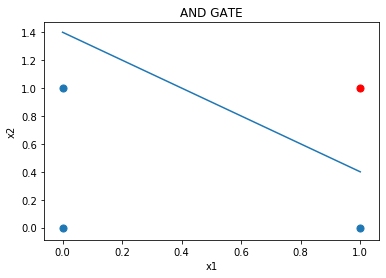

In [94]:
import matplotlib.pyplot as plt

FAND = lambda x : -x +(7./5.)
xs = np.linspace(0,1 ,4)
fig = plt.figure()
plt.scatter([0,0,1],[0,1,0], s=50)
plt.scatter([1],[1], c='red', s=50)
plt.plot(xs, [FAND(x) for x in xs])
plt.title('AND GATE')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

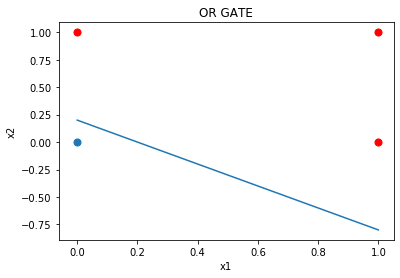

In [95]:
FOR = lambda x : -x + (1./5.)
xs = np.linspace(0,1 ,4)
fig = plt.figure()
plt.scatter([0],[0], s=50)
plt.scatter([0,1,1],[1,0,1], c='red', s=50)
plt.plot(xs, [FOR(x) for x in xs])
plt.title('OR GATE')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

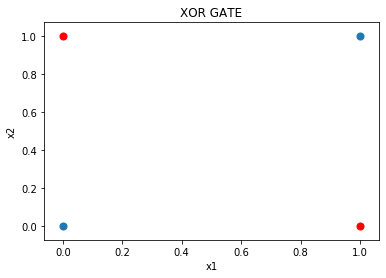

In [97]:
fig = plt.figure()
plt.scatter([0,1],[0,1], s=50)
plt.scatter([0,1],[1,0], c='red', s=50)
plt.title('XOR GATE')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [281]:
import torch

x = torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]])
y = torch.FloatTensor([[0],[1],[1],[0]])

linear = torch.nn.Linear(2, 1, bias=True)
sigmoid = torch.nn.Sigmoid()
model = torch.nn.Sequential(linear, sigmoid)

criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1)

for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(x)
    
    cost = criterion(hypothesis, y)
    cost.backward()
    optimizer.step()
    if step % 1000 == 0:
        print(step, cost.item())

0 0.714327871799469
1000 0.6931471824645996
2000 0.6931471824645996
3000 0.6931471824645996
4000 0.6931471824645996
5000 0.6931471824645996
6000 0.6931471824645996
7000 0.6931471824645996
8000 0.6931471824645996
9000 0.6931471824645996
10000 0.6931471824645996


In [285]:
ws = linear.weight
bias = linear.bias

def XOR(x1, x2):
    tmp = ws[0][0]*x1 + ws[0][1]*x2 + bias[0]
    if tmp <= 0:
        return 0
    else:
        return 1

In [286]:
print('XOR(0,0): {}'.format(XOR(0,0)))
print('XOR(0,1): {}'.format(XOR(0,1)))
print('XOR(1,0): {}'.format(XOR(1,0)))
print('XOR(1,1): {}'.format(XOR(1,1)))

XOR(0,0): 1
XOR(0,1): 0
XOR(1,0): 0
XOR(1,1): 0


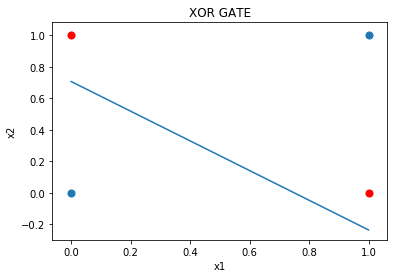

In [288]:
FXOR = lambda x : -(ws[0][0]/ws[0][1])*x - (bias/ws[0][1])
xs = np.linspace(0,1 ,4)
fig = plt.figure()
plt.scatter([0,1],[0,1], s=50)
plt.scatter([0,1],[1,0], c='red', s=50)
plt.plot(xs, [FXOR(x) for x in xs])
plt.title('XOR GATE')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Loss function

### MSE

In [173]:
def mean_squre_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [180]:
t = np.array([0, 0, 1, 0, 0, 0])
y = np.array([0.1, 0.05, 0.6, 0, 0.05, 0.7])
mean_squre_error(y, t)

0.3325

In [181]:
t = np.array([0, 0, 1, 0, 0, 0])
y = np.array([0.1, 0.05, 0.6, 0, 0.05, 0.1])
mean_squre_error(y, t)

0.09250000000000003

### CEE

In [204]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [203]:
t = np.array([0, 0, 1, 0, 0, 0])
y = np.array([0.1, 0.05, 0.6, 0, 0.05, 0.9])
cross_entropy_error(y, t)

0.510825457099338

In [201]:
y = np.array([0.1, 0.05, 0.6, 0, 0.05, 0.1])
cross_entropy_error(y, t)

0.510825457099338

In [202]:
y = np.array([0.1, 0.05, 0.01, 0, 0.05, 0.9])
cross_entropy_error(y, t)

4.605160186038091

## MLP : XOR

In [238]:
import torch

x = torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]])
y = torch.FloatTensor([[0],[1],[1],[0]])

linear1 = torch.nn.Linear(2, 3, bias=True)
linear2 = torch.nn.Linear(3, 1, bias=True)

sigmoid = torch.nn.Sigmoid()
model = torch.nn.Sequential(linear1, sigmoid, linear2, sigmoid)

criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

for step in range(30001):
    optimizer.zero_grad()
    hypothesis = model(x)
    
    cost = criterion(hypothesis, y)
    cost.backward()
    optimizer.step()
    if step % 10000 == 0:
        print(step, cost.item())
        print(hypothesis)

0 0.7181969285011292
tensor([[0.3906],
        [0.3979],
        [0.3824],
        [0.3902]], grad_fn=<SigmoidBackward>)
10000 0.01966029591858387
tensor([[0.0151],
        [0.9822],
        [0.9826],
        [0.0276]], grad_fn=<SigmoidBackward>)
20000 0.0065301451832056046
tensor([[0.0053],
        [0.9941],
        [0.9942],
        [0.0090]], grad_fn=<SigmoidBackward>)
30000 0.0038678855635225773
tensor([[0.0032],
        [0.9965],
        [0.9965],
        [0.0053]], grad_fn=<SigmoidBackward>)


In [279]:
ws1 = linear1.weight.detach().numpy()
ws2 = linear2.weight.detach().numpy()
bias1 = linear1.bias.detach().numpy()
bias2 = linear2.bias.detach().numpy()

def XOR(x1, x2):
    tmp = np.zeros(3)
    for i in range(len(ws1)):
        tmp[i] += ws1[i][0]*x1 + ws1[i][1]*x2 + bias1[i]

    for i in range(3):
        if tmp[i] <= 0:
            tmp[i] = 0
        else:
            tmp[i] = 1
            
    tmp = ws2[0][0]*tmp[0] + ws2[0][1]*tmp[1] + ws2[0][2]*tmp[2] + bias2[0]
    
    if tmp <= 0:
        return 0
    else:
        return 1

In [280]:
print('XOR(0,0): {}'.format(XOR(0,0)))
print('XOR(0,1): {}'.format(XOR(0,1)))
print('XOR(1,0): {}'.format(XOR(1,0)))
print('XOR(1,1): {}'.format(XOR(1,1)))

XOR(0,0): 0
XOR(0,1): 1
XOR(1,0): 1
XOR(1,1): 0
